# Исследование рынка компьютерных игр

## Изучение данных датафрейма

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

Откроем файл с данными и изучим общую информацию.

In [2]:
data = pd.read_csv('games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Датафрейм содержит 11 столбцов и 16 715 строк. В столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score и Rating наблюдаются пропуски, их следует, по возможности, обработать.

In [4]:
data.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
12867,Alvin and the Chipmunks,Wii,2007.0,Misc,0.05,0.00,0.00,0.00,30.0,3.6,E
13527,Virtua Tennis 3,X360,2007.0,Sports,0.03,0.01,0.00,0.00,80.0,6.8,E
6881,4x4 EVO 2,XB,2001.0,Racing,0.18,0.05,0.00,0.01,59.0,6.2,E
5888,Army Men: Air Attack 2,PS,2000.0,Action,0.17,0.11,0.00,0.02,74.0,5.3,T
8115,F1 Challenge,SAT,1994.0,Racing,0.00,0.00,0.18,0.00,NaN,NaN,NaN


На первый взгляд следует привести к нижнему регистру наименования столбцов, данные в столбце с годом релиза привести к соответсвующему типу данных, разобраться с пропусками и поискать дубликаты.

## Подготовка данных

### Обработка пропусков и замена типов данных

Приведем к нижнему регистру наименования столбцов

In [5]:
data.columns = data.columns.str.lower()

Посмотрим, где и в каком кол-ве есть пропуски

In [6]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в имени и жанре у двух древних игр, можно смело удалять, данные по ним очень скудные и не повлияют на исследование.

In [8]:
data.dropna(subset = ['name'], inplace = True)

Посмотрим на пропуски в годах релиза

In [9]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


269 пропусков, меньше 10% от всего датафрейма, попробуем удалить.

In [10]:
data.dropna(subset = ['year_of_release'], inplace = True)

Заменим тип данных в годах релиза

In [11]:
data['year_of_release'] = data['year_of_release'].astype('int64')

Обратим внимание на значение 'tbd' в столбце с оценкой пользователей. Поиск в интренете говорит, что это значит "Подлежит определению", т.е. оценка еще не определена. Фактически, это то же самое, что и NaN, поэтому tbd можно заменить на NaN.

In [12]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'] = data['user_score'].astype('float64')

Пропуски в оценке критиков, пользователей и рейтинге

In [13]:
print(f'У {data["critic_score"].isna().sum()} строки датафрейма отсутствует значение в столбце с оценкой критиков.')
print(f'У {data["user_score"].isna().sum()} строки датафрейма отсутствует значение в столбце с оценкой пользователей.')
print(f'У {data["rating"].isna().sum()} строк датафрейма отсутствует значение в столбце с рейтингом.')

У 8461 строки датафрейма отсутствует значение в столбце с оценкой критиков.
У 8981 строки датафрейма отсутствует значение в столбце с оценкой пользователей.
У 6676 строк датафрейма отсутствует значение в столбце с рейтингом.


In [14]:
data[(data['critic_score'].isna()) & (data['user_score'].isna()) & (data['rating'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


6580 строк содержат пропуски одновременно в оценке критиков, пользователей и рейтинге, пропуски как в старых, так и в "свежих" играх.

Такой большой объем пропусков нельзя заменить без риска повлиять на результаты исследования, поэтому лучше оставить их нетронутыми, так как все три параметра зависят от содержания конкретной игры, которое мы не можем определить по имеющимся данным. 

### Подсчет суммарных продаж

Посчитаем суммы продаж по всем регионам и добавим в датафрейм в новый столбец

In [15]:
data['world_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

## Исследовательский анализ данных

### Cколько игр выпускалось в разные годы

Построим график и посмотрим на динамику выхода игр в разные годы

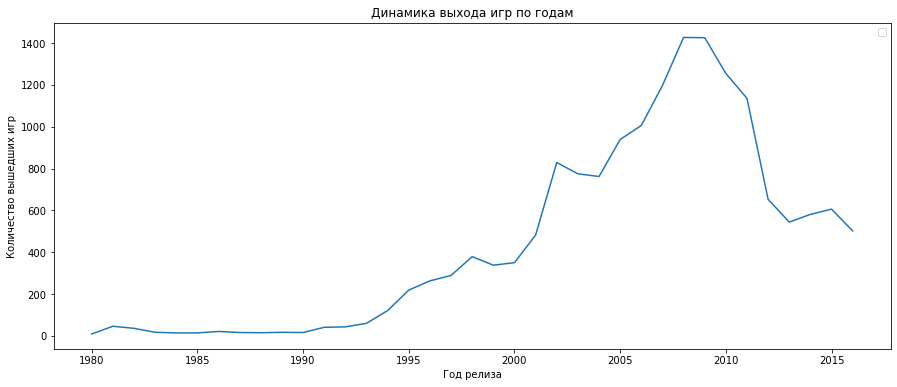

In [16]:
data_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(15,6))
sns.lineplot(data=data_year)
plt.title('Динамика выхода игр по годам')
plt.xlabel('Год релиза')
plt.ylabel('Количество вышедших игр')
plt.legend('')
plt.show()

Судя по графику, с 1990 начался плавный рост числа выпускаемых игр, с 2000 наблюдается довольно резкий скачок вверх, который пошел на спад только после 2008-2009 года. К 2013 году спад замедляется, возможно, для прогноза стоит использовать имеено этот отрезок с 2013 по 2016.

###  Как менялись продажи по платформам

Посмотрим на продажи для каждой платформы, чтобы отобрать самые популярные.

In [17]:
data_clear_year = data.query('year_of_release > 1999')
data_platform_sales = data_clear_year.pivot_table(index='platform', 
                                       values='world_sales', aggfunc='sum').sort_values(by='world_sales', ascending=False)

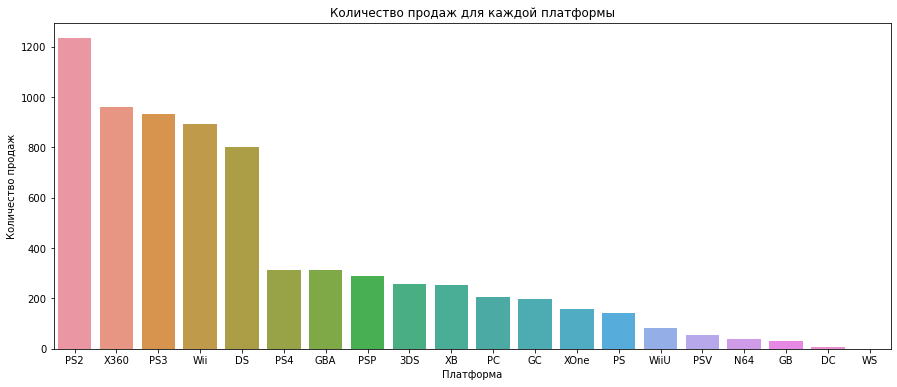

In [18]:
plt.figure(figsize=(15,6))
sns.barplot(x=data_platform_sales.index, y=data_platform_sales['world_sales'])
plt.title('Количество продаж для каждой платформы')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.show()

С заметным отрывом лидируют 5 игровых платформ: PS2, X360, PS3, Wii, DS.

Посмотрим на распределение продаж для ТОП-5 платформ по годам

In [19]:
top_platforms = list(data_platform_sales[:5].index)

In [20]:
data_top_platform_year = data_clear_year.pivot_table(index='platform', columns='year_of_release', values='world_sales', 
                                          aggfunc='sum').query('platform in @top_platforms').T

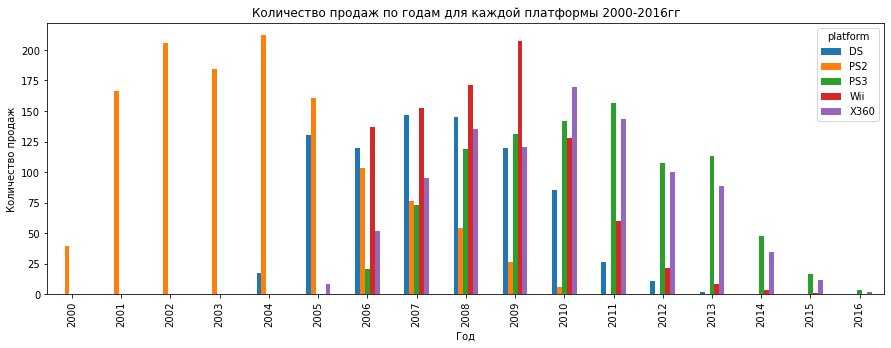

In [21]:
data_top_platform_year.plot(kind='bar', figsize=(15,5))
plt.title('Количество продаж по годам для каждой платформы 2000-2016гг')
plt.xlabel('Год')
plt.ylabel('Количество продаж')
plt.show()

На графике видно, что жизненный цикл каждой платформы состовляет около 10 лет. При этом можем наблюдать, что продажи PS2 сошли на нет в 2010 году, то же самое происходит с PS3 в 2016, что логично, так как на их место пришла PS4. К 2013 сдулись продажи DS, к 2015 Wii и X360.

### Определение актуального периода

На основании данных анализа, представленных выше, можно обозначить актуальный период анализа в 3 года - с 2013, когда резкий спад числа выпущенных игр змедлился, по настоящее время. При этом, данные за 2016 год у нас не полные, а это может сказаться на результатах исследования, т.к. из-за недостаточности данных может показаться ложный тренд на снижение.

In [22]:
actual_data = data.query('year_of_release > 2012')

### Определение потенциально прибыльных платформ

Используя данные за актуальный период, посмотрим на продажи платформ.

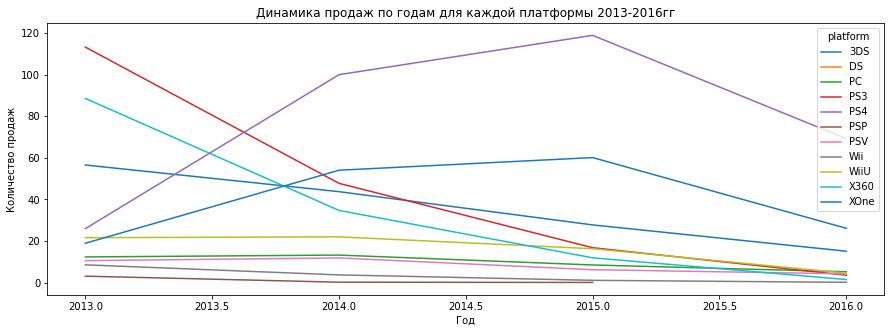

In [24]:
actual_data_sales = actual_data.pivot_table(index='platform', columns='year_of_release', values='world_sales', 
                                          aggfunc='sum').T
actual_data_sales.plot(kind='line', figsize=(15,5))
plt.title('Динамика продаж по годам для каждой платформы 2013-2016гг')
plt.xlabel('Год')
plt.ylabel('Количество продаж')
plt.show()

Всего у двух платформ наблюдается тренд на рост продаж: XOne и PS4, у остальных же либо стабильно низкий уровень, либо тренд на снижение. Некогда популярные платформы к 2016 году уже не актуальны и не пользуются успехом на глобальном рынке.

Отберем ТОП-5 платформ по уровню продаж.

In [25]:
top5_actual_platforms = list(actual_data.groupby('platform')['world_sales'].sum().sort_values(ascending=False)[:5].index)

In [26]:
print(", ".join(top5_actual_platforms))

PS4, PS3, XOne, 3DS, X360


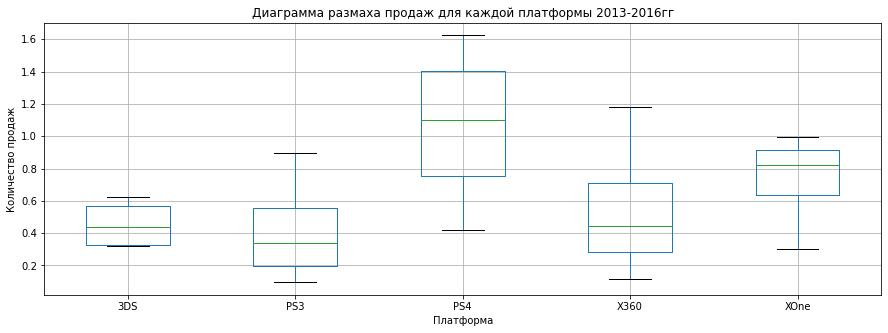

In [27]:
persp_platforms = actual_data.query('platform in @top5_actual_platforms')
persp_platforms.pivot_table(index='year_of_release', columns='platform', 
                            values='world_sales').boxplot(figsize=(15, 5))
plt.title('Диаграмма размаха продаж для каждой платформы 2013-2016гг')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.show()

Если посмотреть на продажи по всему миру по каждой платформе, то можно увидеть, что PS4 значительно опережает другие платформы. Межквартильный размах PS4 расположен намного выше, чем у других платформ. Однозначно, PS4 очень перспективная платформа, ее пытается догнать XOne. 

### Как влияют на продажи внутри платформы отзывы пользователей и критиков

Для ответа на этот вопрос рассмотрим данные об отзывах популярной платформы PS4.

In [29]:
PS4_data = actual_data.query('platform == "PS4"')

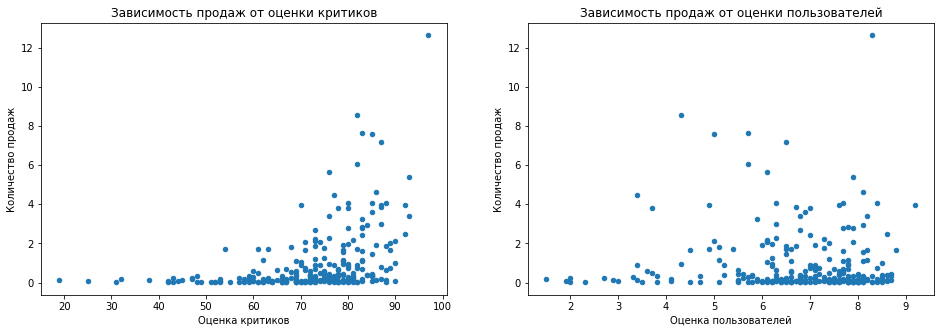

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
PS4_data.plot(x='critic_score', y='world_sales', kind='scatter', ax=axes[0])
PS4_data.plot(x='user_score', y='world_sales', kind='scatter', ax=axes[1])
axes[0].set(title='Зависимость продаж от оценки критиков')
axes[0].set(xlabel='Оценка критиков')
axes[0].set(ylabel='Количество продаж')
axes[1].set(title='Зависимость продаж от оценки пользователей')
axes[1].set(xlabel='Оценка пользователей')
axes[1].set(ylabel='Количество продаж')
plt.show()

In [31]:
print(f"Корреляция между оценками критиков и продажами составляет {round((PS4_data['critic_score'].corr(PS4_data['world_sales'])), 2)}")
print(f"Корреляция между оценками пользователей и продажами составляет {round((PS4_data['user_score'].corr(PS4_data['world_sales'])), 2)}")

Корреляция между оценками критиков и продажами составляет 0.41
Корреляция между оценками пользователей и продажами составляет -0.03


Для интерпретации корреляционной связи будем использовать шкалу Чеддока:

- от 0 до 0,3 - очень слабая
- от 0,3 до 0,5 - слабая
- от 0,5 до 0,7 - средняя
- от 0,7 до 0,9 - высокая
- от 0,9 до 1 - очень высокая

Связь между оценками критиков и продажами слабая. Очень слабая обратная связь между оценками пользователей и продажами, ее практически нет.

**Посмотрим на корреляцию у других платформ**

In [32]:
def correlation(platform_name):
    platform_data = actual_data[actual_data['platform'] == platform_name]
    
    critic_corr = platform_data['critic_score'].corr(platform_data['world_sales'])
    user_corr = platform_data['user_score'].corr(platform_data['world_sales'])
    
    print(f"Корреляция между оценками критиков и продажами у {platform_name} составляет {round(critic_corr, 2)}")
    print(f"Корреляция между оценками пользователей и продажами у {platform_name} составляет {round(user_corr, 2)}")
    print()

In [33]:
for platform in top5_actual_platforms:
    correlation(platform)  

Корреляция между оценками критиков и продажами у PS4 составляет 0.41
Корреляция между оценками пользователей и продажами у PS4 составляет -0.03

Корреляция между оценками критиков и продажами у PS3 составляет 0.33
Корреляция между оценками пользователей и продажами у PS3 составляет 0.0

Корреляция между оценками критиков и продажами у XOne составляет 0.42
Корреляция между оценками пользователей и продажами у XOne составляет -0.07

Корреляция между оценками критиков и продажами у 3DS составляет 0.36
Корреляция между оценками пользователей и продажами у 3DS составляет 0.24

Корреляция между оценками критиков и продажами у X360 составляет 0.35
Корреляция между оценками пользователей и продажами у X360 составляет -0.01



На основании полученных данных, можем отметить, что оценка пользователей очень слабо влияет на продажи только в случае с платформой 3DS, в остальных случаях связь настолько мала, что будем считать, что ее нет.

Оценка критиков у всех платформ стабильно показывает слабую связь с продажами. То есть высокая оценка критиков в какой-то степени влияет на рост продаж, хоть и слабо.

### Общее распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам

In [34]:
genre_data = actual_data.pivot_table(index='genre', values='world_sales', 
                                     aggfunc='sum').sort_values(by='world_sales', ascending=False)

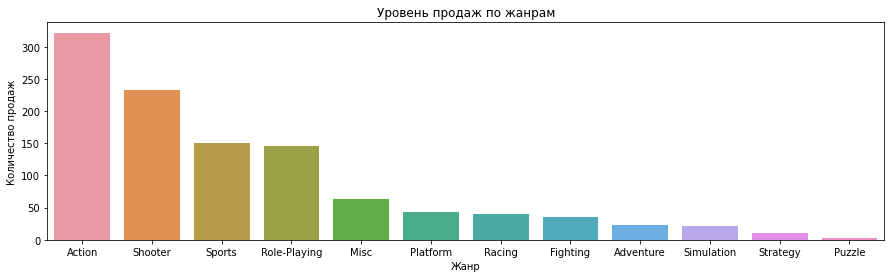

In [35]:
plt.figure(figsize=(15,4))
sns.barplot(x=genre_data.index, y=genre_data['world_sales'])
plt.title('Уровень продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж')
plt.show()

In [36]:
top5_genre_data = list(genre_data[:5].index)

In [37]:
print(f'ТОП-5 жанров: {", ".join(top5_genre_data)}. В аутсайдерах игры в жанрах Pazzle и Strategy')

ТОП-5 жанров: Action, Shooter, Sports, Role-Playing, Misc. В аутсайдерах игры в жанрах Pazzle и Strategy


**Вывод**

- C 1990 начался плавный рост количества выпускаемых игр, на период с 2000 по 2008 пришелся резкий скачок вверх, а после 2009 и вплоть до 2013 года количество игр начало стремительно сокращаться.

- Жизненный цикл платформы составляет около 10 лет.

- Самые популярные игровые платформы за все время: PS2, X360, PS3, Wii, DS.

- Для целей настоящего исследования актуальный период анализа следует обозначить в последние 3 года - с 2013 по настоящее время.

- Популярные за актуальный период платформы: PS4, X360, PS3, XOne, 3DS. Тренд на рост продаж наблюдается только у XOne и PS4. 

- PS4 значительно опережает другие платформы по количеству проданных игр.

- Оценка пользователей не влияет на продажи. Ооценка критиков слабо, но напрямую влияет на продажи внутри платформы.

- ТОП-5 самых прибыльных жанров на ауктуальный период: Action, Shooter, Sports, Role-Playing и Misc. Самые бесперспективные жанры: паззлы и стратегии.

## Портрет пользователя

Составим портрет пользователя для каждого региона, для этого выясним:
- Самые популярные платформы (топ-5)
- Самые популярные жанры (топ-5)
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### North America

**Самые популярные платформы**

In [38]:
na_platform_sales = actual_data.pivot_table(index='platform', values='na_sales', 
                                     aggfunc='sum').sort_values(by='na_sales', ascending=False)

In [39]:
world_platform_sales = actual_data.pivot_table(index='platform', values='world_sales', 
                                     aggfunc='sum').sort_values(by='world_sales', ascending=False)

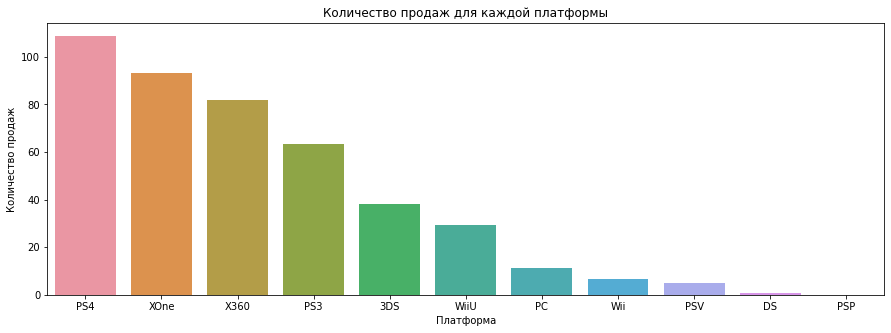

In [40]:
plt.figure(figsize=(15,5))
sns.barplot(x=na_platform_sales.index, y=na_platform_sales['na_sales'])
plt.title('Количество продаж для каждой платформы')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')

plt.show()

In [41]:
top5_na_platform = list(na_platform_sales[:5].index)

In [42]:
print(f'ТОП-5 платформ в Северной Америке: {", ".join(top5_na_platform)}')

ТОП-5 платформ в Северной Америке: PS4, XOne, X360, PS3, 3DS


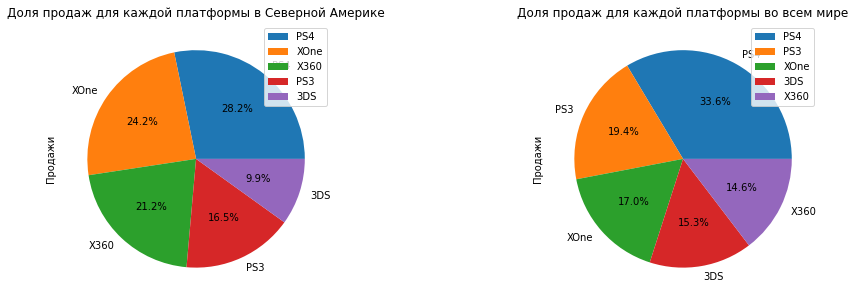

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

na_platform_sales.query('platform in @top5_na_platform').plot.pie(y='na_sales', autopct='%1.1f%%', ax=axes[0])
world_platform_sales.query('platform in @top5_actual_platforms').plot.pie(y='world_sales', autopct='%1.1f%%', ax=axes[1])
axes[0].set(title='Доля продаж для каждой платформы в Северной Америке')
axes[0].set(ylabel='Продажи')
axes[1].set(title='Доля продаж для каждой платформы во всем мире')
axes[1].set(ylabel='Продажи')
plt.show()

Североамериканский рынок возглавляет PS4, что соответсвует общемировой тенденции, далее чуть меньшую долю рынка занимает XOne, хотя в целом на мировом рынке он все же на 3 месте. Не сильно отстает его предшественник X360, не смотря на то, что по продажам во всем мире он плетется в хвосте. PS3 занимает лишь 4 место против 2 на мировой арене. Самая малая доля рынка остается за 3DS.

**Самые популярные жанры**

In [44]:
na_genre = actual_data.pivot_table(index='genre', values='na_sales', 
                                     aggfunc='sum').sort_values(by='na_sales', ascending=False)

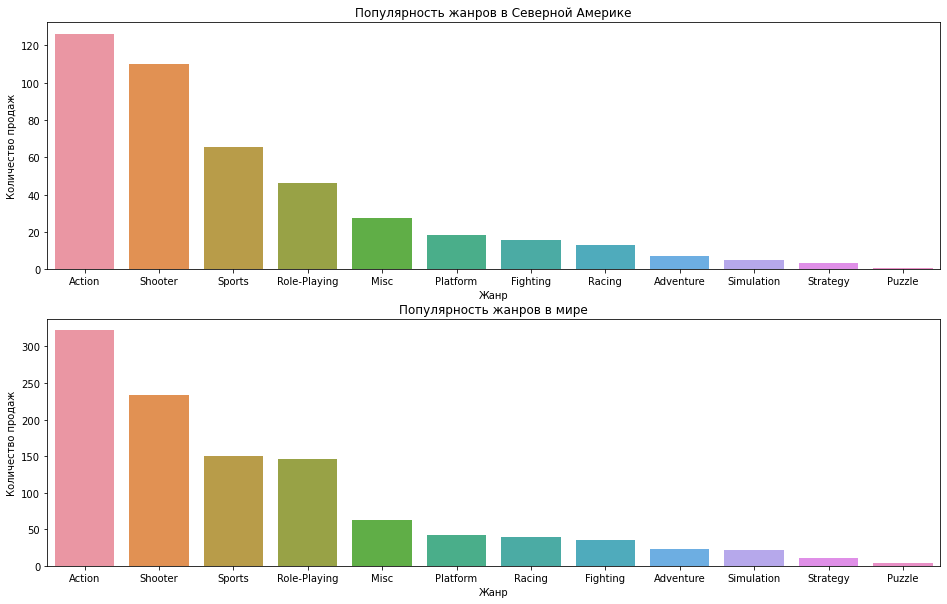

In [45]:
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

sns.barplot(x=na_genre.index, y=na_genre['na_sales'], ax=axes[0])
axes[0].set(title='Популярность жанров в Северной Америке')
axes[0].set(xlabel='Жанр')
axes[0].set(ylabel='Количество продаж')

sns.barplot(x=genre_data.index, y=genre_data['world_sales'], ax=axes[1])
axes[1].set(title='Популярность жанров в мире')
axes[1].set(xlabel='Жанр')
axes[1].set(ylabel='Количество продаж')

plt.show()

In [46]:
top5_na_genre = list(na_genre[:5].index)
print(f'ТОП-5 жанров в Северной Америке: {", ".join(top5_na_genre)}')

ТОП-5 жанров в Северной Америке: Action, Shooter, Sports, Role-Playing, Misc


Популярность жанров компьютерных игр в Северной Америке полностью соответсвует общемировым тенденциям. Можно отметить, что игры в жанре Sports несколько популярнее Role-Playing, тогда как во всем мире популярность этих жанров примерно на одном уровне.

**Влияние рейтинга ESRB на продажи**

In [47]:
na_rating_sales = actual_data.pivot_table(index='rating', values='na_sales', 
                                     aggfunc='sum').sort_values(by='na_sales', ascending=False)
world_rating_sales = actual_data.pivot_table(index='rating', values='world_sales', 
                                     aggfunc='sum').sort_values(by='world_sales', ascending=False)

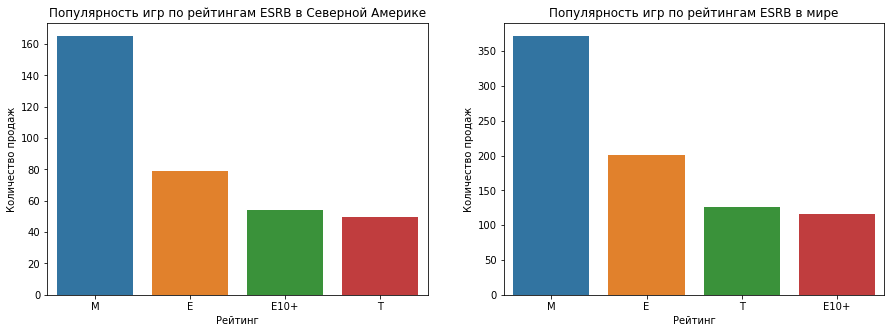

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x=na_rating_sales.index, y=na_rating_sales['na_sales'], ax=axes[0])
axes[0].set(title='Популярность игр по рейтингам ESRB в Северной Америке')
axes[0].set(xlabel='Рейтинг')
axes[0].set(ylabel='Количество продаж')

sns.barplot(x=world_rating_sales.index, y=world_rating_sales['world_sales'], ax=axes[1])
axes[1].set(title='Популярность игр по рейтингам ESRB в мире')
axes[1].set(xlabel='Рейтинг')
axes[1].set(ylabel='Количество продаж')

plt.show()

В Северной Америке востребованы игры рейтинга M и E, как и во всем мире. При этом, наоборот чуть более популярны игры с рейтингом E10+, нежели T.

**Вывод**

Характерные черты пользователя из Северной Америки:
- самые популярные платформы PS4, XOne, X360, PS3 и 3DS
- популярные жанры Action, Shooter, Sports, Role-Playing и Misc
- больше всего покупают игр с рейтингом M, далее идет E, E10+, T.

### Europe

**Самые популярные платформы**

In [49]:
eu_platform_sales = actual_data.pivot_table(index='platform', values='eu_sales', 
                                     aggfunc='sum').sort_values(by='eu_sales', ascending=False)

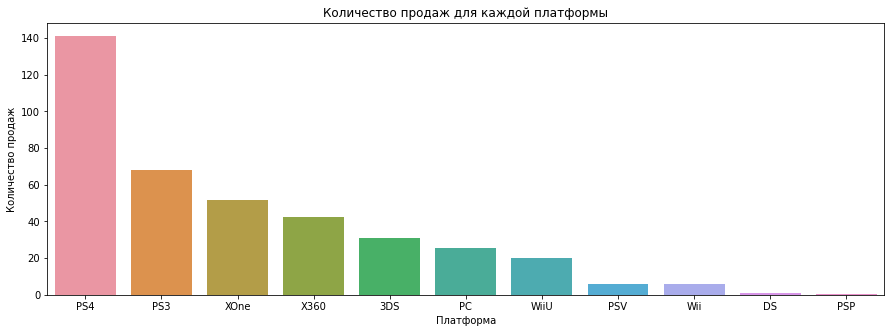

In [50]:
plt.figure(figsize=(15,5))
sns.barplot(x=eu_platform_sales.index, y=eu_platform_sales['eu_sales'])
plt.title('Количество продаж для каждой платформы')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')

plt.show()

In [51]:
top5_eu_platform = list(eu_platform_sales[:5].index)

In [52]:
print(f'ТОП-5 платформ в Европе: {", ".join(top5_eu_platform)}')

ТОП-5 платформ в Европе: PS4, PS3, XOne, X360, 3DS


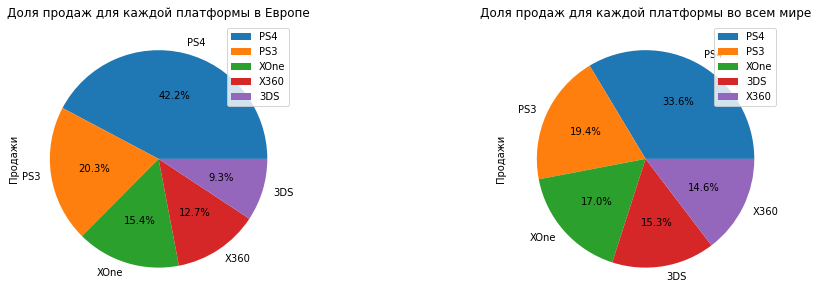

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

eu_platform_sales.query('platform in @top5_eu_platform').plot.pie(y='eu_sales', autopct='%1.1f%%', ax=axes[0])
world_platform_sales.query('platform in @top5_actual_platforms').plot.pie(y='world_sales', autopct='%1.1f%%', ax=axes[1])
axes[0].set(title='Доля продаж для каждой платформы в Европе')
axes[0].set(ylabel='Продажи')
axes[1].set(title='Доля продаж для каждой платформы во всем мире')
axes[1].set(ylabel='Продажи')
plt.show()

С большим отрывом лидирует PS4, почти половина рынка, на втором месте PS3, дальше плетутся XBox и 3DS.

**Самые популярные жанры**

In [54]:
eu_genre = actual_data.pivot_table(index='genre', values='eu_sales', 
                                     aggfunc='sum').sort_values(by='eu_sales', ascending=False)

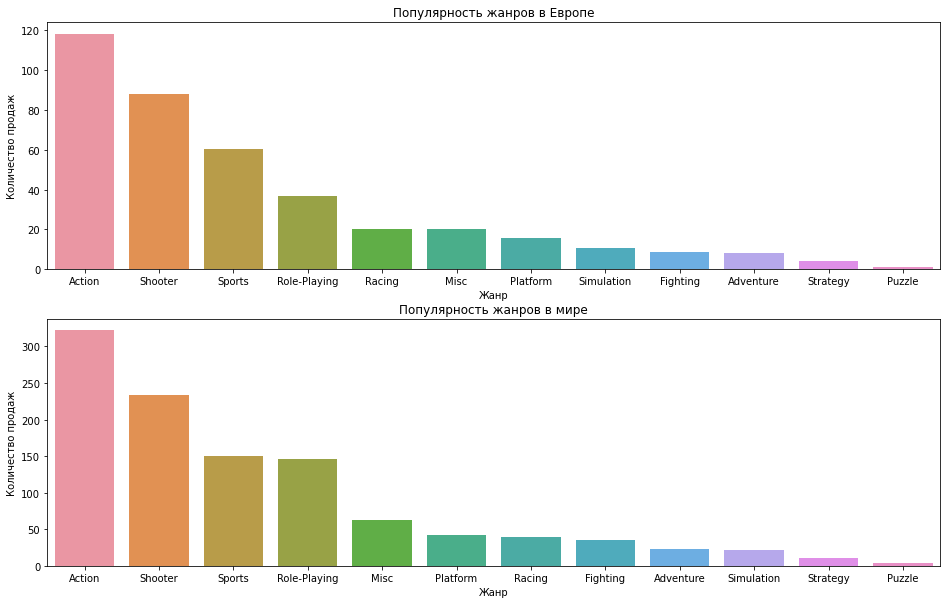

In [55]:
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

sns.barplot(x=eu_genre.index, y=eu_genre['eu_sales'], ax=axes[0])
axes[0].set(title='Популярность жанров в Европе')
axes[0].set(xlabel='Жанр')
axes[0].set(ylabel='Количество продаж')

sns.barplot(x=genre_data.index, y=genre_data['world_sales'], ax=axes[1])
axes[1].set(title='Популярность жанров в мире')
axes[1].set(xlabel='Жанр')
axes[1].set(ylabel='Количество продаж')

plt.show()

In [56]:
top5_eu_genre = list(eu_genre[:5].index)
print(f'ТОП-5 жанров в Европе: {", ".join(top5_eu_genre)}')

ТОП-5 жанров в Европе: Action, Shooter, Sports, Role-Playing, Racing


Предпочтения по жанрам у Европы такие же, как и в Северной Америке, однако в Европе несколько больше любителей гонок.

**Влияние рейтинга ESRB на продажи**

In [57]:
eu_rating_sales = actual_data.pivot_table(index='rating', values='eu_sales', 
                                     aggfunc='sum').sort_values(by='eu_sales', ascending=False)
world_rating_sales = actual_data.pivot_table(index='rating', values='world_sales', 
                                     aggfunc='sum').sort_values(by='world_sales', ascending=False)

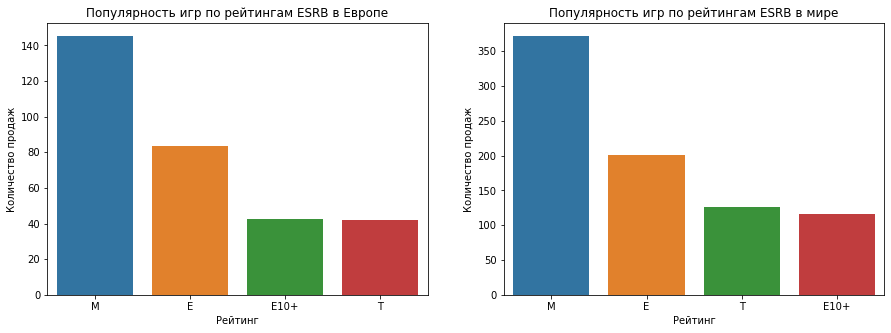

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x=eu_rating_sales.index, y=eu_rating_sales['eu_sales'], ax=axes[0])
axes[0].set(title='Популярность игр по рейтингам ESRB в Европе')
axes[0].set(xlabel='Рейтинг')
axes[0].set(ylabel='Количество продаж')

sns.barplot(x=world_rating_sales.index, y=world_rating_sales['world_sales'], ax=axes[1])
axes[1].set(title='Популярность игр по рейтингам ESRB в мире')
axes[1].set(xlabel='Рейтинг')
axes[1].set(ylabel='Количество продаж')

plt.show()

Популярность игр в зависимости от рейтинга в Европе в целом соответствует данным по Северной Америке. 

**Вывод**

Характерные черты пользователя из Европы:
- самая популярная платформа у европейцев - PS4 и ее прошлое поколение, дальше идут платформы XBox и 3DS
- в Европе популярны те же жанры, что и в Северной Америке, чуть больше любят в европе гонки
- распределение по рейтингам ESRB соответствует североамериканскому рынку

### Japan

**Самые популярные платформы**

In [59]:
jp_platform_sales = actual_data.pivot_table(index='platform', values='jp_sales', 
                                     aggfunc='sum').sort_values(by='jp_sales', ascending=False)

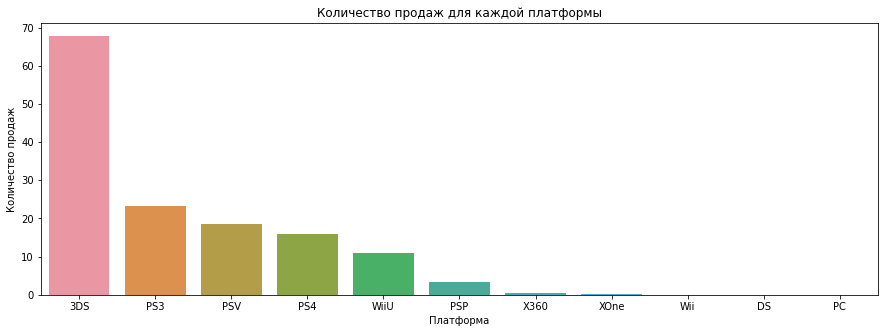

In [60]:
plt.figure(figsize=(15,5))
sns.barplot(x=jp_platform_sales.index, y=jp_platform_sales['jp_sales'])
plt.title('Количество продаж для каждой платформы')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')

plt.show()

In [61]:
top5_jp_platform = list(jp_platform_sales[:5].index)

In [62]:
print(f'ТОП-5 платформ в Японии: {", ".join(top5_jp_platform)}')

ТОП-5 платформ в Японии: 3DS, PS3, PSV, PS4, WiiU


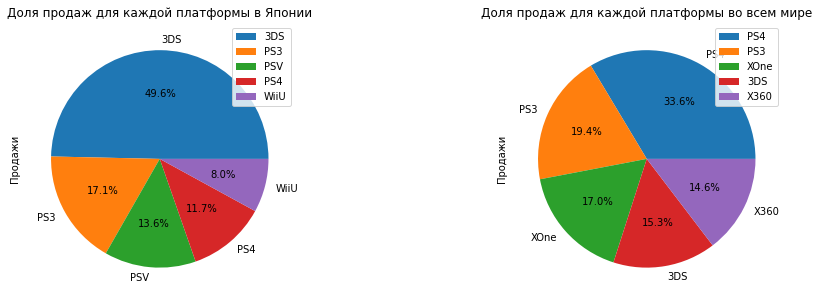

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

jp_platform_sales.query('platform in @top5_jp_platform').plot.pie(y='jp_sales', autopct='%1.1f%%', ax=axes[0])
world_platform_sales.query('platform in @top5_actual_platforms').plot.pie(y='world_sales', autopct='%1.1f%%', ax=axes[1])
axes[0].set(title='Доля продаж для каждой платформы в Японии')
axes[0].set(ylabel='Продажи')
axes[1].set(title='Доля продаж для каждой платформы во всем мире')
axes[1].set(ylabel='Продажи')
plt.show()

Половину рынка занимает платформа 3DS, остаток делят между собой разничные платформы PS, небольшой кусочек ухватила WiiU.

**Самые популярные жанры**

In [64]:
jp_genre = actual_data.pivot_table(index='genre', values='jp_sales', 
                                     aggfunc='sum').sort_values(by='jp_sales', ascending=False)

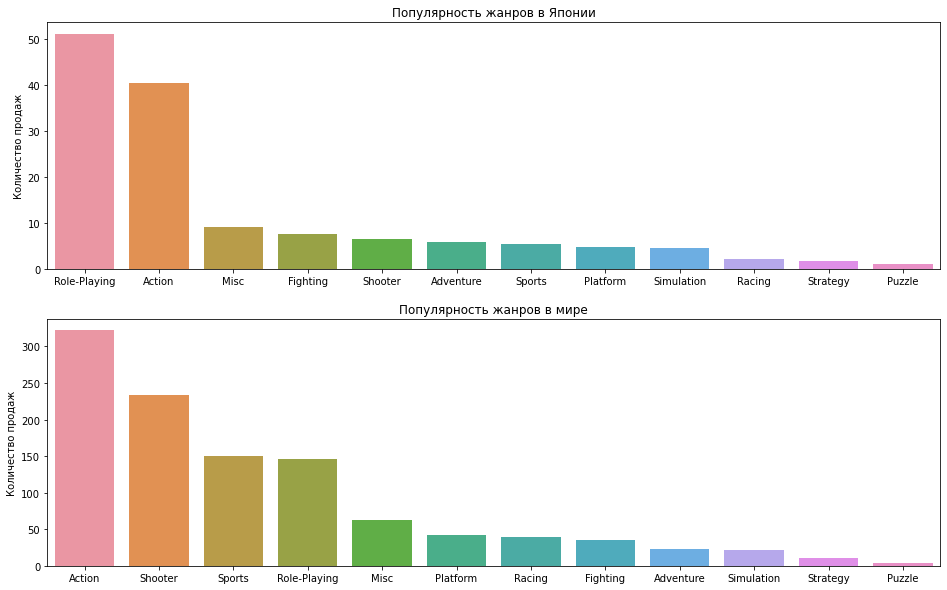

In [65]:
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

sns.barplot(x=jp_genre.index, y=jp_genre['jp_sales'], ax=axes[0])
axes[0].set(title='Популярность жанров в Японии')
axes[0].set(xlabel='')
axes[0].set(ylabel='Количество продаж')

sns.barplot(x=genre_data.index, y=genre_data['world_sales'], ax=axes[1])
axes[1].set(title='Популярность жанров в мире')
axes[1].set(xlabel='')
axes[1].set(ylabel='Количество продаж')

plt.show()

In [66]:
top5_jp_genre = list(jp_genre[:5].index)
print(f'ТОП-5 жанров в Японии: {", ".join(top5_jp_genre)}')

ТОП-5 жанров в Японии: Role-Playing, Action, Misc, Fighting, Shooter


**Влияние рейтинга ESRB на продажи**

In [67]:
jp_rating_sales = actual_data.pivot_table(index='rating', values='jp_sales', 
                                     aggfunc='sum').sort_values(by='jp_sales', ascending=False)
world_rating_sales = actual_data.pivot_table(index='rating', values='world_sales', 
                                     aggfunc='sum').sort_values(by='world_sales', ascending=False)

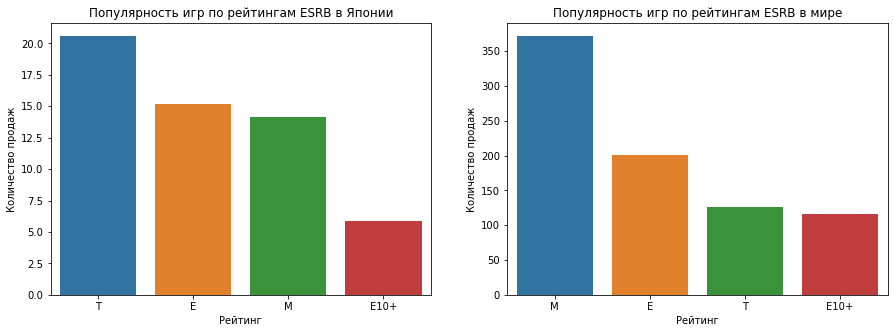

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x=jp_rating_sales.index, y=jp_rating_sales['jp_sales'], ax=axes[0])
axes[0].set(title='Популярность игр по рейтингам ESRB в Японии')
axes[0].set(xlabel='Рейтинг')
axes[0].set(ylabel='Количество продаж')

sns.barplot(x=world_rating_sales.index, y=world_rating_sales['world_sales'], ax=axes[1])
axes[1].set(title='Популярность игр по рейтингам ESRB в мире')
axes[1].set(xlabel='Рейтинг')
axes[1].set(ylabel='Количество продаж')

plt.show()

Совершенно другая картина с популярными рейтингами на японском рынке - в топе игры для подростков (13+), второе место делят игры 17+ и для всех.

**Вывод**

Характерные черты пользователя из Японии:
- самая популярная платформа 3DS, также востебованы вариации PS и WiiU
- из жанров лидируют по популярности Role-Playing и Action, намного меньше Misc, Fighting, Shooter
- по рейтингу ESRB в топе игры для подростков, от 17 лет и для всех

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и альтернативную гипотезы:
- средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC
- средний пользовательский рейтинг платформы Xbox One не равен среднему пользовательскому рейтингу платформы PC

Подготовим данные для проверки гипотез

In [69]:
xone_data = actual_data.query('platform == "XOne"')
pc_data = actual_data.query('platform == "PC"')

Приступим к проверке

In [70]:
alpha = .05
results = st.ttest_ind(xone_data['user_score'], pc_data['user_score'], nan_policy='omit')
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.1401265840361139
Не получилось отвергнуть нулевую гипотезу


Вероятность того, что мы можем получить разные средние пользовательские оценки случайно - 14%, это больше 5%. Нулевую гипотезу отвергать нельзя - средние пользовательские рейтинги платформ XOne и PC равны.

### Средние пользовательские рейтинги жанров Action и Sports разные

Сформулируем нулевую и альтернативную гипотезы:
- средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports
- средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports

Подготовим данные для проверки гипотез

In [71]:
action_data = actual_data.query('genre == "Action"')
sports_data = actual_data.query('genre == "Sports"')

Приступим к проверке

In [72]:
alpha = .05
results = st.ttest_ind(action_data['user_score'], sports_data['user_score'], nan_policy='omit')
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.0517832389142297e-27
Отвергаем нулевую гипотезу


Вероятность того, что мы можем получить разные средние пользовательские оценки случайно - 0,95%, это меньше 5%. Можно отвергнуть нулевую гипотезу - средние пользовательские рейтинги жанров Action и Sports не равны.

## Общий вывод

Было проведено исследование рынка компьютерных игр для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. В нашем распоряжении были исторические данные (до 2016 года) из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).
Основной задачей было выявить определяющие успешность игры закономерности, чтобы выявить потенциально популярный продукт и спланировать рекламные кампании.

В ходе исследования удалось выяснить следующее, что с 1990 плавно начался рост количества выпускаемых игр, на период с 2000 по 2008 пришелся резкий скачок вверх, а после 2009 и вплоть до 2013 года количество выпускаемых игр начало стремительно сокращаться. Продолжительность "жизни" игровой платформы около 10 лет, а самые популярные игровые платформы за все время: PS2, X360, PS3, Wii, DS.

Для целей настоящего исследования актуальный период анализа был обозначен с 2013 по 2016 год.
Популярные за актуальный период платформы: PS4, X360, PS3, XOne, 3DS. При этом тренд на рост продаж наблюдается только у XOne и PS4, предыдущие их поколения все еще пользуются популярностью, но их жизненный цикл подходит к концу, а значит, продажи неминуемо будут продолжать падать. PS4 значительно опережает другие платформы по количеству проданных игр.

Ислледование оценок пользователей и критиков показало, что пользовательские оценки не влияют на продажи, а оценки критиков слабо, но напрямую влияют на продажи внутри платформы.

Среди самых популярных жанров за ауктуальный период можно выделить: Action, Shooter, Sports, Role-Playing и Misc. Самые безперспективные жанры: паззлы и стратегии. При этом по регионам эти данные будут несколько отличаться.

По результатам исследования удалось составить портреты пользователей различных регионов.
Пользователь из Северной Америки:
- самые популярные платформы PS4, XOne, X360, PS3 и 3DS
- популярные жанры Action, Shooter, Sports, Role-Playing и Misc
- больше всего покупают игр с рейтингом "17+" и "для всех", поменьше "10+" и "13+"

Пользователь из Европы:
- PS4 и ее прошлое поколение с большим отрывом от остальных, пытаются не отставать XBox и 3DS
- в Европе популярны те же жанры, что и в Северной Америке, за исключением гонок - только в европе они входят в топ-5 игр
- распределение по рейтингам ESRB то же, что и в Северной Америке: "17+" и "для всех" в топе, далее идут "10+" и "13+"

Пользователь из Японии:
- безусловным лидером является 3DS, также востебованы различные виды платформ PS и WiiU
- в отличие от американского и европейского рынков самые популярные жанры - Role-Playing и Action, намного меньше Misc, Fighting, Shooter
- по рейтингу ESRB в топе игры для подростков "13+", "17+" и "для всех"

Также удалось выяснить, что средние пользовательские рейтинги платформ Xbox One и PC равны, а те же рейтинги в жанрах Action и Sports разные.

Возвращаясь к основной цели ислледования, можем сделать следующие выводы:

Перспективные платформы на ближайшие несколько лет - PS4, XOne и 3DS. При этом есть региональная специфика - на Японский рынок не стоит выходить с играми на XOne, так как платформа там совершенно не востребована, а половину рынка занимает 3DS.

Из жанров стоит сделать ставку на Shooter и Action, при этом, для японского рынка однозначно надо ориентироваться на Role-Playing.

По рейтингу ESRB самые популярные игры "17+" и "для всех", на японский рынок стоит идти в том числе с "13+".